## Apple Health Processor

-----

## Dependencies and Libraries

In [66]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib notebook

------

## Functions for Processing Dates and Timezones

In [2]:
# functions to convert UTC to Shanghai time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('US/Eastern'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_minute = lambda x: convert_tz(x).minute
get_day_of_week = lambda x: convert_tz(x).weekday()

---

## Steps

In [3]:
steps = pd.read_csv("data/StepCount.csv")

In [6]:
steps.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
221537,Akash’s Apple Watch,7.6,"<<HKDevice: 0x281845d10>, name:Apple Watch, ma...",StepCount,count,2021-07-21 14:45:03 -0400,2021-07-21 14:39:47 -0400,2021-07-21 14:39:50 -0400,8
221538,Akash’s Apple Watch,7.6,"<<HKDevice: 0x281845d10>, name:Apple Watch, ma...",StepCount,count,2021-07-21 14:45:03 -0400,2021-07-21 14:40:49 -0400,2021-07-21 14:41:15 -0400,36
221539,Akash's iPhone,14.6,"<<HKDevice: 0x281846ee0>, name:iPhone, manufac...",StepCount,count,2021-07-21 15:17:42 -0400,2021-07-21 15:05:50 -0400,2021-07-21 15:06:03 -0400,29
221540,Akash’s Apple Watch,7.6,"<<HKDevice: 0x281845d10>, name:Apple Watch, ma...",StepCount,count,2021-07-21 15:05:42 -0400,2021-07-21 15:04:02 -0400,2021-07-21 15:04:05 -0400,6
221541,Akash’s Apple Watch,7.6,"<<HKDevice: 0x281845d10>, name:Apple Watch, ma...",StepCount,count,2021-07-21 15:16:38 -0400,2021-07-21 15:05:50 -0400,2021-07-21 15:15:16 -0400,33


In [7]:
# parse out date and time elements as Shanghai time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)

In [8]:
steps.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow
0,Akash's iPhone,9.3.1,"<<HKDevice: 0x281845c20>, name:iPhone, manufac...",StepCount,count,2016-06-23 00:28:33 -0400,2016-06-22 15:42:34-04:00,2016-06-22 15:44:10 -0400,72,2016,2016-06,2016-06-22,22,11,2
1,Akash's iPhone,9.3.1,"<<HKDevice: 0x281845c20>, name:iPhone, manufac...",StepCount,count,2016-06-23 00:28:33 -0400,2016-06-22 15:52:35-04:00,2016-06-22 15:55:59 -0400,80,2016,2016-06,2016-06-22,22,11,2
2,Akash's iPhone,9.3.1,"<<HKDevice: 0x281845c20>, name:iPhone, manufac...",StepCount,count,2016-06-23 00:28:33 -0400,2016-06-22 16:07:25-04:00,2016-06-22 16:07:43 -0400,20,2016,2016-06,2016-06-22,22,12,2
3,Akash's iPhone,9.3.1,"<<HKDevice: 0x281845c20>, name:iPhone, manufac...",StepCount,count,2016-06-23 00:28:33 -0400,2016-06-22 16:21:12-04:00,2016-06-22 16:25:56 -0400,150,2016,2016-06,2016-06-22,22,12,2
4,Akash's iPhone,9.3.1,"<<HKDevice: 0x281845c20>, name:iPhone, manufac...",StepCount,count,2016-06-23 00:28:33 -0400,2016-06-22 16:34:16-04:00,2016-06-22 16:40:08 -0400,18,2016,2016-06,2016-06-22,22,12,2


In [9]:
steps.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value', 'year', 'month', 'date', 'day', 'hour',
       'dow'],
      dtype='object')

In [10]:
steps_by_date = steps.groupby(['date'])['value'].sum().reset_index(name='Steps')

In [11]:
steps_by_date.tail()

,date,Steps
1845,2021-07-17,16726
1846,2021-07-18,55201
1847,2021-07-19,19883
1848,2021-07-20,20165
1849,2021-07-21,7016


In [12]:
# steps_by_date.tail(10)
steps_by_date.to_csv("data/steps_per_day.csv", index=False)

-----

### Use Only Watch Steps, Remove Phone Steps

In [13]:
steps_device_by_year = steps.groupby(['year', 'sourceName'])['value'].sum().reset_index(name='Steps')

In [14]:
steps_device_by_year

,year,sourceName,Steps
0,2016,Akash's iPhone,1491191
1,2016,Akash’s Apple Watch,1269569
2,2017,Akash's iPhone,3347787
3,2017,Akash’s Apple Watch,2746328
4,2018,Akash's iPhone,3723920
5,2018,Akash’s Apple Watch,2473320
6,2019,Akash's iPhone,3627761
7,2019,Akash’s Apple Watch,2790222
8,2020,Akash's iPhone,1978617
9,2020,Akash’s Apple Watch,1849549


In [15]:
steps.sourceName.unique()

array(["Akash's iPhone", 'Akash’s Apple\xa0Watch'], dtype=object)

In [16]:
# drop phone steps
steps = steps[steps.sourceName == 'Akash’s Apple\xa0Watch']
# steps.head()

## Rolling Average

<AxesSubplot:title={'center':'Daily step counts rolling mean over 10 days'}, xlabel='date'>

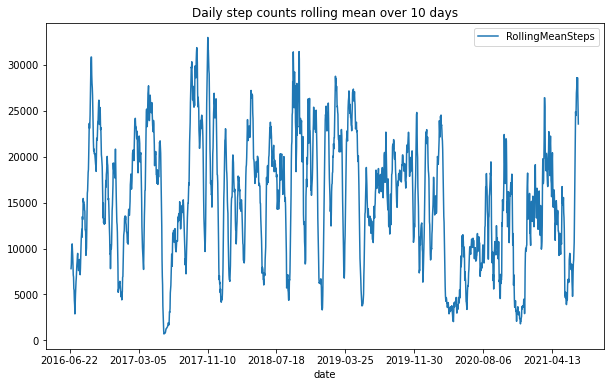

In [17]:
steps_by_date['RollingMeanSteps'] = steps_by_date.Steps.rolling(window=10, center=True).mean()
steps_by_date.plot(x='date', y='RollingMeanSteps', title= 'Daily step counts rolling mean over 10 days', figsize=[10, 6])

## Steps by Day of Week

In [18]:
steps_by_date['date'] = pd.to_datetime(steps_by_date['date'])
steps_by_date['dow'] = steps_by_date['date'].dt.weekday

Text(0.5, 0, 'Day of Week')

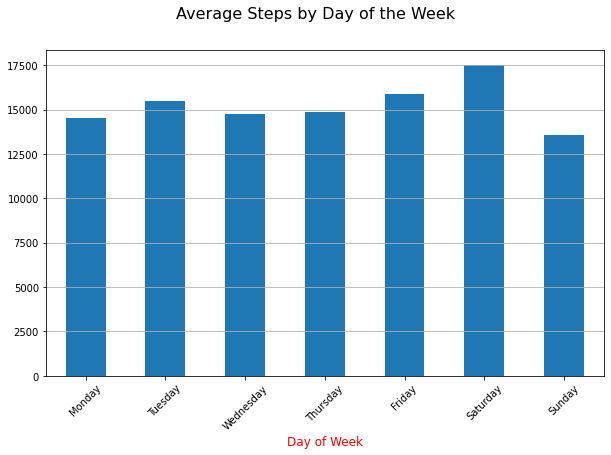

In [19]:
data = steps_by_date.groupby(['dow'])['Steps'].mean()

fig, ax = plt.subplots(figsize=[10, 6])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)

plt.suptitle('Average Steps by Day of the Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Day of Week', fontsize=12, color='red')

------

## Monthly Steps

In [20]:
total_steps_by_month = steps.groupby(['month'])['value'].sum().reset_index(name='Steps')

In [21]:
total_steps_by_month

,month,Steps
0,2016-06,31145
1,2016-07,99432
2,2016-08,174160
3,2016-09,325404
4,2016-10,284026
...,...,...
57,2021-03,294493
58,2021-04,257477
59,2021-05,192881
60,2021-06,81337


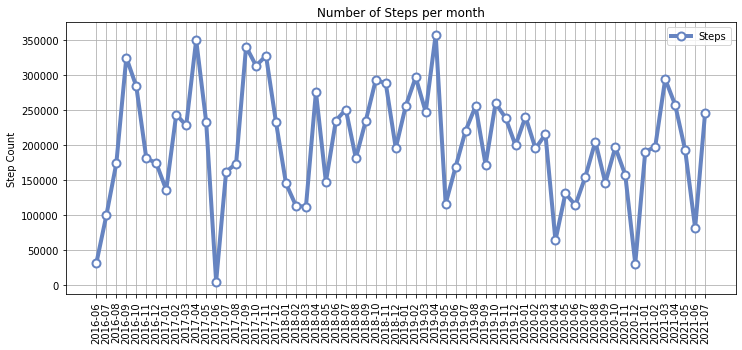

In [22]:
# a bit of a hackish solution, could use improvement
dataset = total_steps_by_month
chart_title = 'Number of Steps per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Step Count')
# ax.set_xlabel('')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

----

## Steps Per Year

In [21]:
total_steps_by_years = steps.groupby(['year'])['value'].sum().reset_index(name='Steps')

In [22]:
total_steps_by_years

,year,Steps
0,2017,3212141
1,2018,3849766
2,2019,2311753


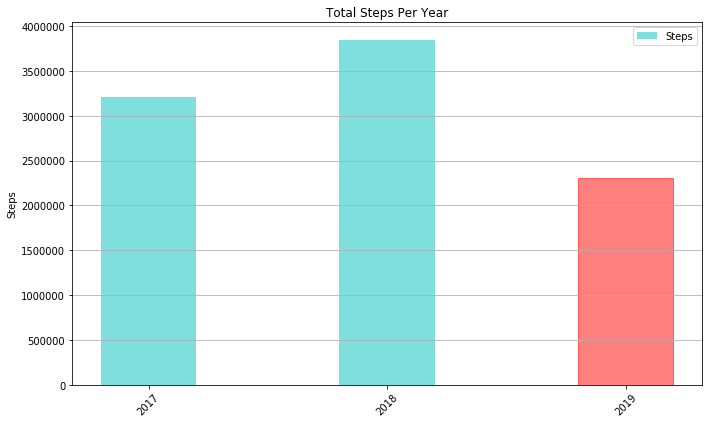

In [23]:
dataset = total_steps_by_years

n_groups = len(dataset)
opacity = 0.5
fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)
index = np.arange(n_groups)
bar_width = 0.4

data = plt.bar(index, dataset.Steps, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Steps')

data[-1].set_color('r')

plt.ylabel('Steps')
plt.title('Total Steps Per Year')
plt.xticks(index, dataset.year, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

-----

## Steps by Hour of Day

In [24]:
hour_steps = steps.groupby(['hour'])['value'].sum().reset_index(name='Steps')

In [25]:
# hour_steps

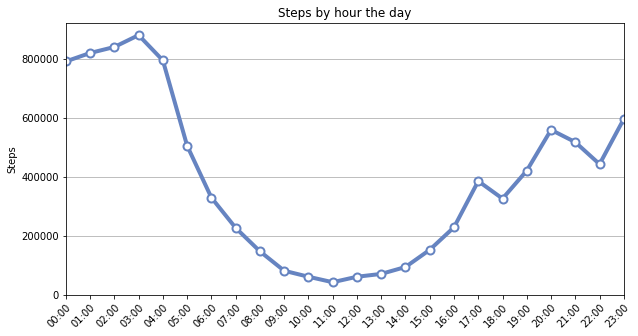

In [26]:
ax = hour_steps.Steps.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_steps.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

# ax.set_xlim((hour_steps.index[0], hour_steps.index[-1]))

ax.yaxis.grid(True)
# ax.set_ylim((0, 1300))
ax.set_ylabel('Steps')
ax.set_xlabel('')
ax.set_title('Steps by hour the day')

plt.show()

-----

In [27]:
weight = pd.read_csv("data/BodyMass.csv")

In [28]:
# weight.columns

In [29]:
# parse out date and time elements as Shanghai time
weight['startDate'] = pd.to_datetime(weight['startDate'])
weight['year'] = weight['startDate'].map(get_year)
weight['month'] = weight['startDate'].map(get_month)
weight['date'] = weight['startDate'].map(get_date)

In [30]:
weight.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date
136,Shortcuts,784,NaN,BodyMass,kg,2019-07-12 23:14:18 +0800,2019-07-12 23:14:18+08:00,2019-07-12 23:14:18 +0800,79.3000,2019,2019-07,2019-07-13
137,BP,7.1.1,NaN,BodyMass,kg,2019-07-15 09:38:32 +0800,2019-07-15 09:36:32+08:00,2019-07-15 09:36:32 +0800,80.5126,2019,2019-07,2019-07-15
138,Shortcuts,788,NaN,BodyMass,kg,2019-07-28 12:04:18 +0800,2019-07-28 12:04:18+08:00,2019-07-28 12:04:18 +0800,80.4000,2019,2019-07,2019-07-28
139,Shortcuts,788,NaN,BodyMass,kg,2019-08-20 19:19:55 +0800,2019-08-20 19:19:55+08:00,2019-08-20 19:19:55 +0800,80.0000,2019,2019-08,2019-08-21
140,Shortcuts,788,NaN,BodyMass,kg,2019-09-04 21:26:04 +0800,2019-09-04 21:26:04+08:00,2019-09-04 21:26:04 +0800,80.9000,2019,2019-09,2019-09-05


In [31]:
month_weight = weight.groupby(['month'])['value'].mean().reset_index(name='Weight')

In [32]:
# month_weight

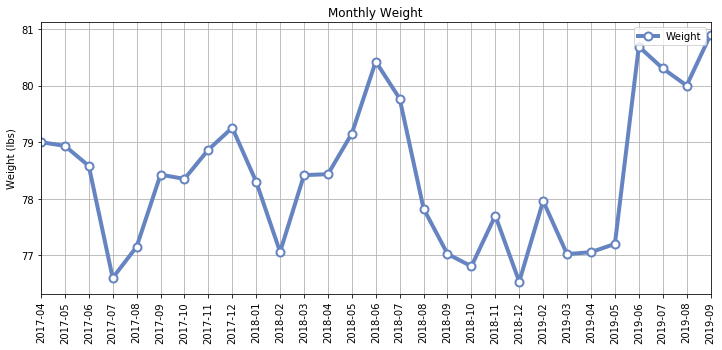

In [33]:
# a bit of a hackish solution, could use improvement
dataset = month_weight
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Weight (lbs)')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

In [34]:
# convert to kg
month_weight['kg'] = round(month_weight['Weight'] / 2.205, 2)

In [35]:
month_weight.columns

Index(['month', 'Weight', 'kg'], dtype='object')

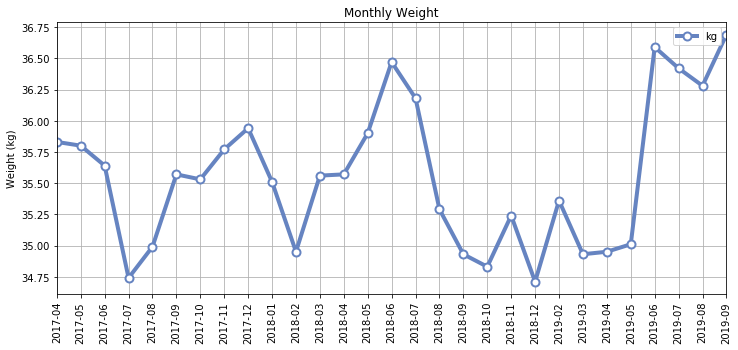

In [36]:
# a bit of a hackish solution, could use improvement
dataset = month_weight[['month', 'kg']]
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Weight (kg)')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

## Heart Rate

In [4]:
resting = pd.read_csv("data/RestingHeartRate.csv")
len(resting)

119

In [24]:
resting.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value'],
      dtype='object')

In [25]:
resting.sourceName.unique()

array(['Akash’s Apple\xa0Watch'], dtype=object)

In [26]:
# parse out date and time elements as Shanghai time
resting['startDate'] = pd.to_datetime(resting['startDate'])
resting['year'] = resting['startDate'].map(get_year)
resting['month'] = resting['startDate'].map(get_month)
resting['date'] = resting['startDate'].map(get_date)

In [27]:
# resting.tail(10)

<AxesSubplot:title={'center':'Resting HR'}, xlabel='date'>

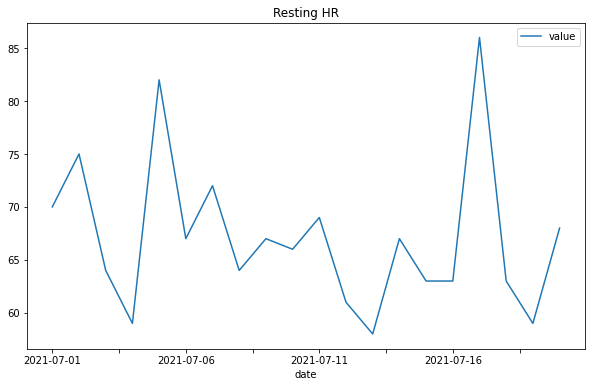

In [29]:
resting[resting.month == '2021-07'].plot(x='date', y='value', title= 'Resting HR', figsize=[10, 6])

In [5]:
hr = pd.read_csv("data/HeartRate.csv")
len(hr)

147116

In [6]:
# hr.tail(10)

In [7]:
# parse out date and time elements as Shanghai time
hr['startDate'] = pd.to_datetime(hr['startDate'])
hr['year'] = hr['startDate'].map(get_year)
hr['month'] = hr['startDate'].map(get_month)
hr['hour'] = hr['startDate'].map(get_hour)
hr['date'] = hr['startDate'].map(get_date)

In [79]:
# plot a single day
test_date = '2021-07-17'
# len(hr[hr.date == test_date])
# TODO: Fix Axis for Hour of Day or Something Similar
# fig = plt.figure()
hr = hr.sort_values(by=['startDate'])
# hr[hr.date == test_date].plot(x='startDate', y='value', title= 'Heart Rate : %s' %(test_date), figsize=[10, 6])
# plt.xlabel('Date-Time')
# plt.ylabel('Heart Rate (bpm)')

In [80]:
hr_test_date = pd.DataFrame(hr[hr.date == test_date])
#get the sampling interval in s
hr_test_date['samplingInteval'] = pd.DataFrame(hr_test_date.startDate.diff())/np.timedelta64(1, 's')

hr_test_date = hr_test_date.rename(columns={"value": "heartRate"})

<IPython.core.display.Javascript object>


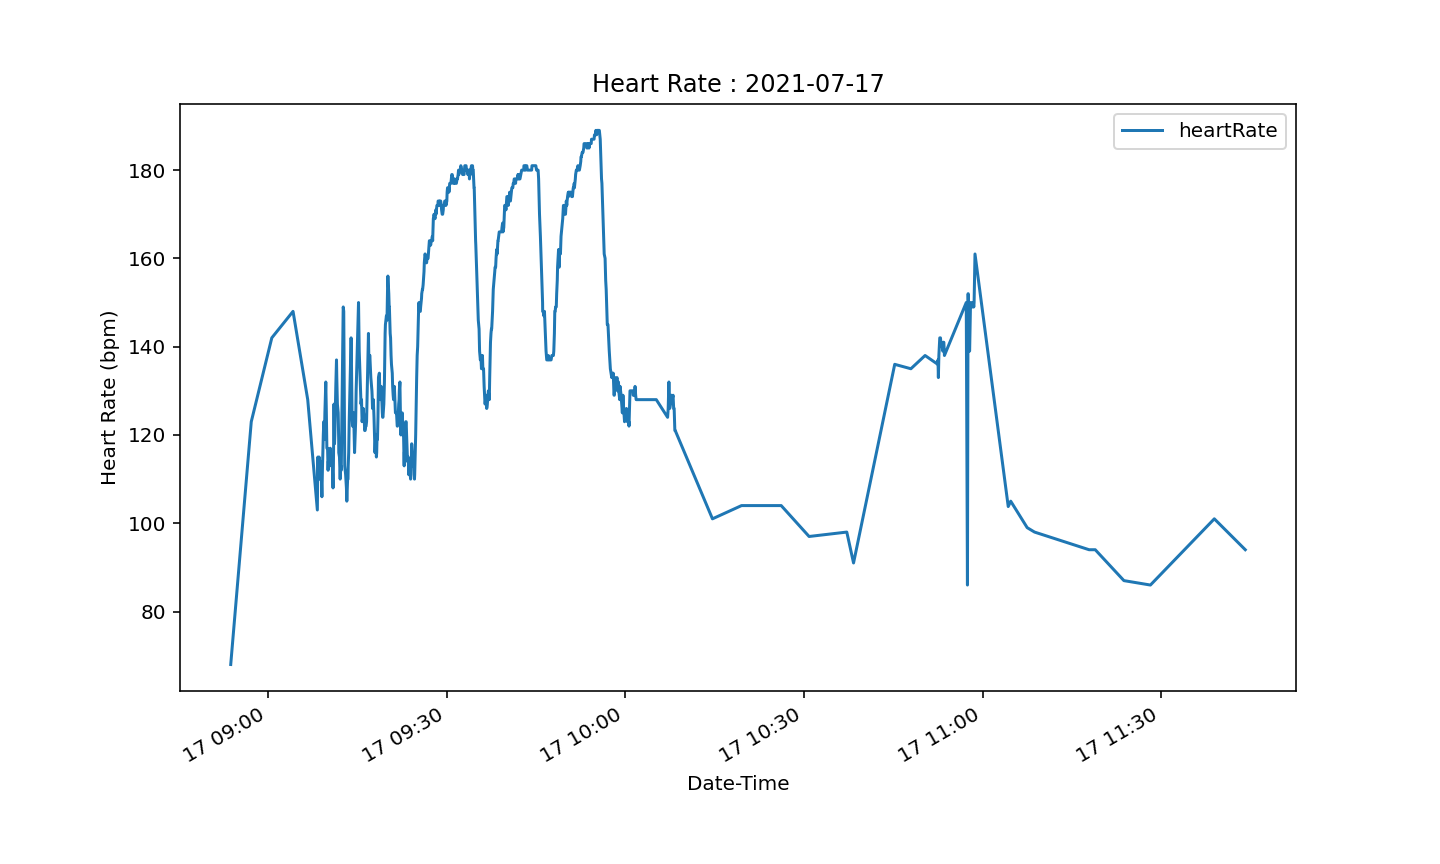

Text(0, 0.5, 'Heart Rate (bpm)')

In [81]:
hr_test_date.plot(x='startDate', y='heartRate', title= 'Heart Rate : %s' %(test_date), figsize=[10, 6])
plt.xlabel('Date-Time')
plt.ylabel('Heart Rate (bpm)')

<IPython.core.display.Javascript object>


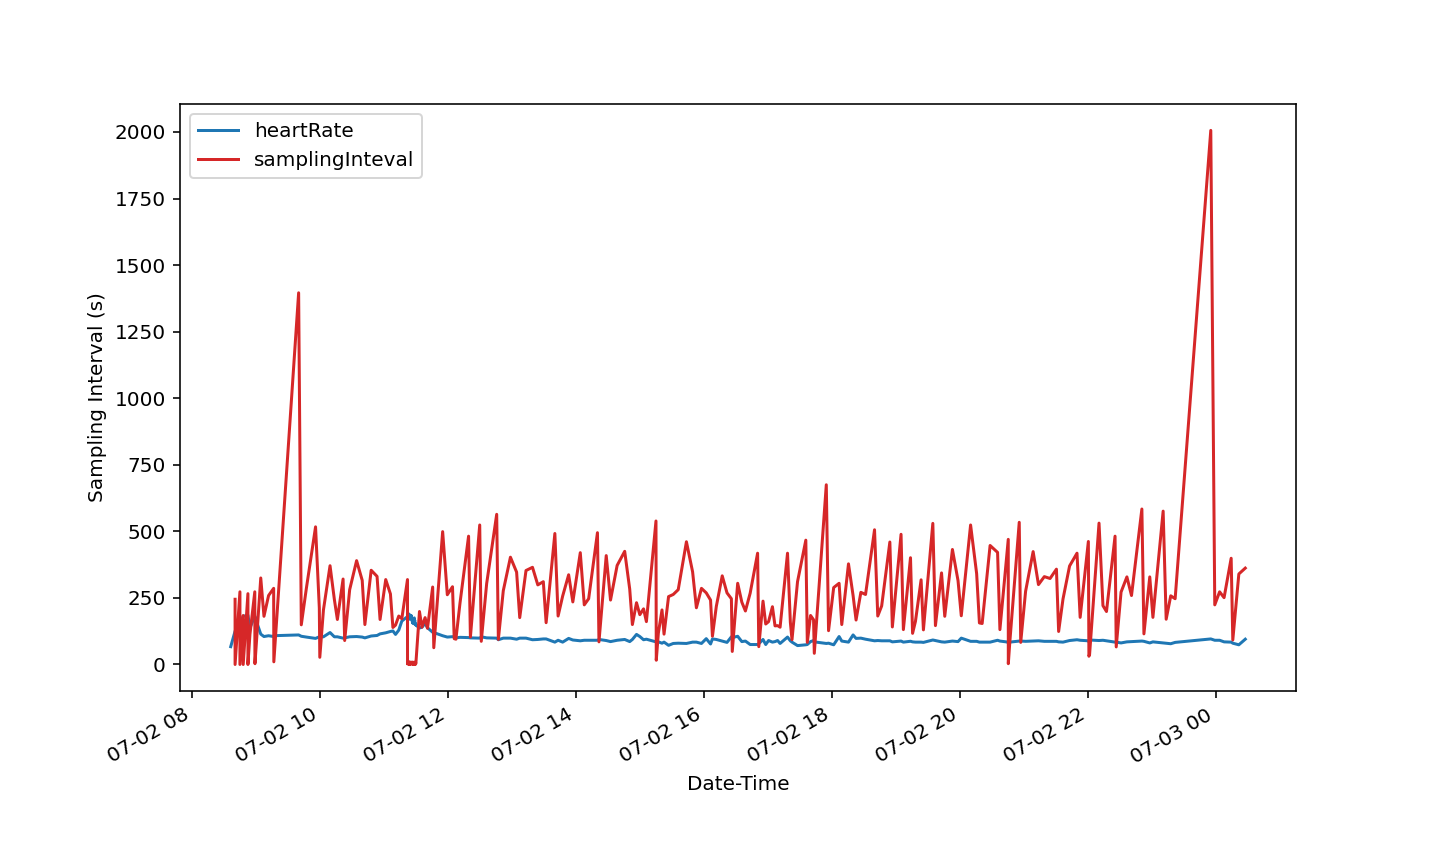

Text(0, 0.5, 'Sampling Interval (s)')

In [76]:
%matplotlib notebook
hr_test_date.plot(x='startDate', y=['heartRate','samplingInteval'], figsize=[10, 6], color=["C0","C3"])
plt.xlabel('Date-Time')
plt.ylabel('Sampling Interval (s)')

<IPython.core.display.Javascript object>


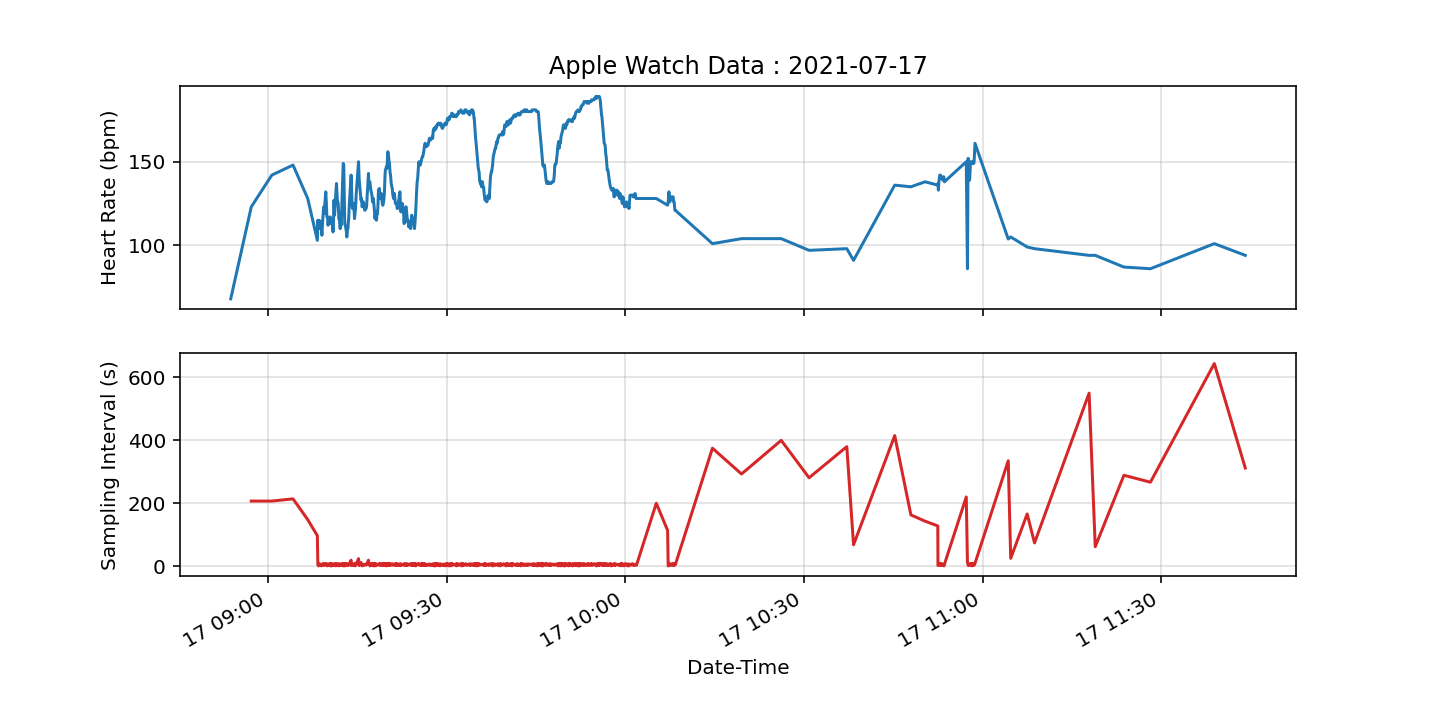

In [87]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(211 )
ax.plot(hr_test_date.startDate, hr_test_date.heartRate, color='C0')

ax.set_ylabel('Heart Rate (bpm)')
ax.set_title('Apple Watch Data : %s' %(test_date))
ax.grid(alpha=0.4)

ax1 = fig.add_subplot(212, sharex=ax)
ax1.plot(hr_test_date.startDate, hr_test_date.samplingInteval, color='C3')
ax1.set_ylabel('Sampling Interval (s)')
ax1.set_xlabel('Date-Time')
ax1.grid(alpha=0.4)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M '))
plt.gcf().autofmt_xdate()



------

# Sleep

In [47]:
sleep_raw = pd.read_csv("data/SleepAnalysis.csv")

In [48]:
sleep_raw.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
6273,AutoSleep,6.2.9,NaN,SleepAnalysis,NaN,2019-09-06 10:06:23 +0800,2019-09-06 03:01:00 +0800,2019-09-06 09:59:00 +0800,HKCategoryValueSleepAnalysisAsleep
6274,AutoSleep,6.2.9,NaN,SleepAnalysis,NaN,2019-09-07 09:46:44 +0800,2019-09-07 03:15:00 +0800,2019-09-07 09:42:00 +0800,HKCategoryValueSleepAnalysisInBed
6275,AutoSleep,6.2.9,NaN,SleepAnalysis,NaN,2019-09-07 09:46:44 +0800,2019-09-07 03:15:00 +0800,2019-09-07 09:42:00 +0800,HKCategoryValueSleepAnalysisAsleep
6276,AutoSleep,6.2.9,NaN,SleepAnalysis,NaN,2019-09-08 10:33:08 +0800,2019-09-08 00:45:00 +0800,2019-09-08 10:27:00 +0800,HKCategoryValueSleepAnalysisInBed
6277,AutoSleep,6.2.9,NaN,SleepAnalysis,NaN,2019-09-08 10:33:08 +0800,2019-09-08 00:45:00 +0800,2019-09-08 10:27:00 +0800,HKCategoryValueSleepAnalysisAsleep


In [49]:
# parse out date and time elements as Shanghai time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)